#                    **<<< DAILY AND SPORTS ACTIVITY RECOGNITION >>>**





In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Set working directory
%cd /content/drive/MyDrive/Colab Notebooks/Project/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Project


In [ ]:
#pd.set_option('display.max_columns', None)   #to visualize dataframe with all column
#pd.reset_option('display.max_columns')       #to UNDO above step

In [ ]:
#Importing Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Converting data fom .txt to CSV and Parqute format**
### **Concatenated All Files From Different Folders**

In [ ]:
# Converting all .txt to concatinatted .csv file
import os
import pandas as pd

# Concatenating 19 dataframes
def read_and_concat_data(activity_dir):
    data = []
    for i in range(1, 9):
        participant_data = []
        directory = os.path.join(activity_dir, f"p{i}")
        filelist = os.listdir(directory)
        for file in filelist:
            filepath = os.path.join(directory, file)
            df = pd.read_csv(filepath, sep=",", header=None)
            participant_data.append(df)
        activity_data = pd.concat(participant_data)
        data.append(activity_data)
    return data

# creating dataset for all 8 activities
def preprocess_data(data, activity):
    for idx, df in enumerate(data):
        df.columns = ["T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro","T_xmag", "T_ymag", "T_zmag",
                     "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
                     "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
                     "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
                     "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"]
        df.insert(45, 'Subject', idx+1)
        df.insert(46, 'Activity', activity)

# Combining data for all activities
activities_data = []
for i in range(1, 20):  # Adjusted for 19 activities
    activity_dir = f'/Users/omkarvilasnarkar/Downloads/MS DAE/Data Mining 7275/A Project/data_txt/a{i:02d}'
    activity_data = read_and_concat_data(activity_dir)
    preprocess_data(activity_data, i)  # Adjusted the preprocessing step here
    activities_data.extend(activity_data)

dataset = pd.concat(activities_data, ignore_index=True)
dataset.head()


In [ ]:
# Converting the concatenated dataframe to the .csv file
dataset.to_csv('DME_dataset.csv', index=False)

In [ ]:
df = pd.read_csv('DME_dataset.csv')
df.head()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,8.0411,1.1530,5.5141,-0.024100,-0.002951,0.007333,-0.78981,-0.072298,0.14805,0.61037,...,-0.040150,-2.8548,-9.0633,2.6393,-0.004407,-0.000894,-0.000569,0.74138,0.30115,-0.056264
1,8.1009,1.1382,5.3951,-0.002307,-0.005099,-0.007220,-0.78982,-0.071518,0.14791,0.62262,...,-0.038971,-2.8697,-9.0633,2.6615,-0.008110,-0.005275,0.004845,0.74128,0.30287,-0.057228
2,8.0859,1.1159,5.4321,0.001318,0.000328,-0.001767,-0.79104,-0.072855,0.15002,0.59345,...,-0.040378,-2.8098,-9.0635,2.6326,-0.014279,0.007983,-0.002314,0.74225,0.30325,-0.054814
3,8.0710,1.1382,5.4545,0.001293,-0.006885,-0.005384,-0.79078,-0.070271,0.15001,0.57373,...,-0.038743,-2.7949,-9.0935,2.6328,-0.018723,0.006059,-0.007749,0.74230,0.30325,-0.054149
4,8.0708,1.1231,5.5141,-0.021358,0.000598,0.005500,-0.79211,-0.072200,0.15011,0.54932,...,-0.038747,-2.7874,-9.0935,2.6180,0.007612,0.009518,-0.018648,0.73976,0.30298,-0.056217


In [ ]:
# Number of rows and Columns in the dataset

print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Rows: {df.shape[1]}')


Number of Rows: 1140000
Number of Rows: 45


In [ ]:
# Is there any Null values?

null_values = df.isnull().any().sum()

if null_values == 0:
  print(f'There are NO null values in the dataset.')
else :
  print(f'Null values in the dataset are:\n {null_values[null_values != 0]}')

There are NO null values in the dataset.


In [ ]:
# description of the data

df.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
count,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,...,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06,1.140000e+06
mean,7.765766e+00,-8.110365e-01,2.768845e+00,-2.796308e-03,1.369504e-02,-3.311756e-03,-5.984356e-01,6.172916e-02,-2.725170e-01,4.260595e+00,...,6.880124e-02,-7.324489e+00,-3.217916e+00,-5.303675e-01,-1.563891e-02,2.786437e-02,-2.453668e-03,4.581072e-01,2.955442e-01,6.450397e-02
std,5.637887e+00,2.623027e+00,3.538260e+00,7.940107e-01,6.910401e-01,3.107657e-01,3.561000e-01,3.404357e-01,3.734116e-01,5.821339e+00,...,3.616374e-01,5.810760e+00,5.925556e+00,3.392620e+00,8.682920e-01,4.835263e-01,1.158953e+00,3.802398e-01,3.838945e-01,3.573842e-01
min,-9.971500e+01,-4.994100e+01,-6.266400e+01,-2.785100e+01,-2.359800e+01,-1.206700e+01,-1.422600e+00,-1.022800e+00,-1.080600e+00,-4.953500e+01,...,-9.875800e-01,-1.180300e+02,-1.198100e+02,-4.338200e+01,-1.208500e+01,-6.925800e+00,-6.783000e+00,-8.443400e-01,-9.017600e-01,-1.126000e+00
25%,6.907000e+00,-1.509500e+00,8.998450e-01,-1.628925e-01,-1.024800e-01,-9.748025e-02,-8.247000e-01,-1.788300e-01,-6.017200e-01,9.497600e-02,...,-2.150700e-01,-9.813000e+00,-7.964425e+00,-2.212200e+00,-3.145400e-01,-1.235925e-01,-3.618825e-01,2.921100e-01,1.928425e-02,-1.711900e-01
50%,8.830300e+00,-3.895300e-01,2.703700e+00,4.610000e-04,1.743750e-02,-2.664000e-03,-6.897500e-01,2.249950e-02,-3.092600e-01,4.143000e+00,...,6.183250e-02,-8.576700e+00,-2.286200e+00,-7.813600e-01,-4.348000e-03,4.310000e-04,-6.810000e-04,5.083700e-01,3.513500e-01,8.164350e-02
75%,9.690500e+00,4.136200e-01,4.405200e+00,1.648200e-01,1.313100e-01,8.882625e-02,-4.925200e-01,2.823500e-01,4.058250e-02,8.505000e+00,...,3.354600e-01,-2.685100e+00,1.080125e-01,3.976525e-01,1.973225e-01,1.423300e-01,5.725375e-01,6.901700e-01,5.848900e-01,2.982200e-01
max,9.369400e+01,4.101300e+01,1.205300e+02,2.767100e+01,1.437900e+01,1.926200e+01,1.021500e+00,1.030900e+00,9.633900e-01,7.165200e+01,...,1.118200e+00,1.736200e+01,7.894700e+01,6.096800e+01,1.915800e+01,8.918400e+00,7.109000e+00,1.374100e+00,1.246600e+00,1.042600e+00


In [ ]:
#Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140000 entries, 0 to 1139999
Data columns (total 45 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   T_xacc    1140000 non-null  float64
 1   T_yacc    1140000 non-null  float64
 2   T_zacc    1140000 non-null  float64
 3   T_xgyro   1140000 non-null  float64
 4   T_ygyro   1140000 non-null  float64
 5   T_zgyro   1140000 non-null  float64
 6   T_xmag    1140000 non-null  float64
 7   T_ymag    1140000 non-null  float64
 8   T_zmag    1140000 non-null  float64
 9   RA_xacc   1140000 non-null  float64
 10  RA_yacc   1140000 non-null  float64
 11  RA_zacc   1140000 non-null  float64
 12  RA_xgyro  1140000 non-null  float64
 13  RA_ygyro  1140000 non-null  float64
 14  RA_zgyro  1140000 non-null  float64
 15  RA_xmag   1140000 non-null  float64
 16  RA_ymag   1140000 non-null  float64
 17  RA_zmag   1140000 non-null  float64
 18  LA_xacc   1140000 non-null  float64
 19  LA_yacc   1140000 non

In [ ]:
df.to_parquet('DME_dataset.parquet')

In [ ]:
import polars as pl
import numpy as np

# Read the Parquet file into a Polars DataFrame
df = pl.read_parquet('DME_dataset.parquet')

# Create a copy of the DataFrame for EDA
df_eda = df.clone()

# Define the number of unique subject values (1 to 8)
num_subjects = 8
# Define the number of unique activity values (1 to 19)
num_activities = 19

# Calculate the number of rows in df_eda
num_rows = len(df_eda)

# Create the sequence of repeating subject values
subject_values = np.repeat(np.arange(1, num_subjects + 1), 142500)

# Create the sequence of repeating activity values
activity_values = np.repeat(np.arange(1, num_activities + 1), 60000)

# Add the 'Subject' and 'Activity' columns to the DataFrame using with_columns()
df_eda = df_eda.with_columns([
    pl.Series("Subject", subject_values),
    pl.Series("Activity", activity_values)
])

# Print the updated DataFrame
print(df_eda.head())


shape: (5, 47)
┌────────┬────────┬────────┬───────────┬───┬─────────┬───────────┬─────────┬──────────┐
│ T_xacc ┆ T_yacc ┆ T_zacc ┆ T_xgyro   ┆ … ┆ LL_ymag ┆ LL_zmag   ┆ Subject ┆ Activity │
│ ---    ┆ ---    ┆ ---    ┆ ---       ┆   ┆ ---     ┆ ---       ┆ ---     ┆ ---      │
│ f64    ┆ f64    ┆ f64    ┆ f64       ┆   ┆ f64     ┆ f64       ┆ i64     ┆ i64      │
╞════════╪════════╪════════╪═══════════╪═══╪═════════╪═══════════╪═════════╪══════════╡
│ 8.0411 ┆ 1.153  ┆ 5.5141 ┆ -0.0241   ┆ … ┆ 0.30115 ┆ -0.056264 ┆ 1       ┆ 1        │
│ 8.1009 ┆ 1.1382 ┆ 5.3951 ┆ -0.002307 ┆ … ┆ 0.30287 ┆ -0.057228 ┆ 1       ┆ 1        │
│ 8.0859 ┆ 1.1159 ┆ 5.4321 ┆ 0.001318  ┆ … ┆ 0.30325 ┆ -0.054814 ┆ 1       ┆ 1        │
│ 8.071  ┆ 1.1382 ┆ 5.4545 ┆ 0.001293  ┆ … ┆ 0.30325 ┆ -0.054149 ┆ 1       ┆ 1        │
│ 8.0708 ┆ 1.1231 ┆ 5.5141 ┆ -0.021358 ┆ … ┆ 0.30298 ┆ -0.056217 ┆ 1       ┆ 1        │
└────────┴────────┴────────┴───────────┴───┴─────────┴───────────┴─────────┴──────────┘


## Sensor Comparitive Analysis (Gyrometer vs Accelerometer vs Magnetometer):

In [ ]:
import polars as pl
import matplotlib.pyplot as plt

# Read the Parquet dataset into a polars DataFrame
df_eda = pl.read_parquet('dataset.parquet')

# Define column groups for accelerometer, gyroscope, and magnetometer
accelerometer_cols = ['T_xacc', 'T_yacc', 'T_zacc']
gyroscope_cols = ['T_xgyro', 'T_ygyro', 'T_zgyro']
magnetometer_cols = ['T_xmag', 'T_ymag', 'T_zmag']

# Select relevant columns from the DataFrame
accelerometer_data = df_eda[accelerometer_cols].to_pandas()
gyroscope_data = df_eda[gyroscope_cols].to_pandas()
magnetometer_data = df_eda[magnetometer_cols].to_pandas()


<ipython-input-83-61529f6010da>:13: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  gyroscope_mean_by_activity = df_eda.groupby('Activity').agg(
<ipython-input-83-61529f6010da>:19: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  magnetometer_mean_by_activity = df_eda.groupby('Activity').agg(


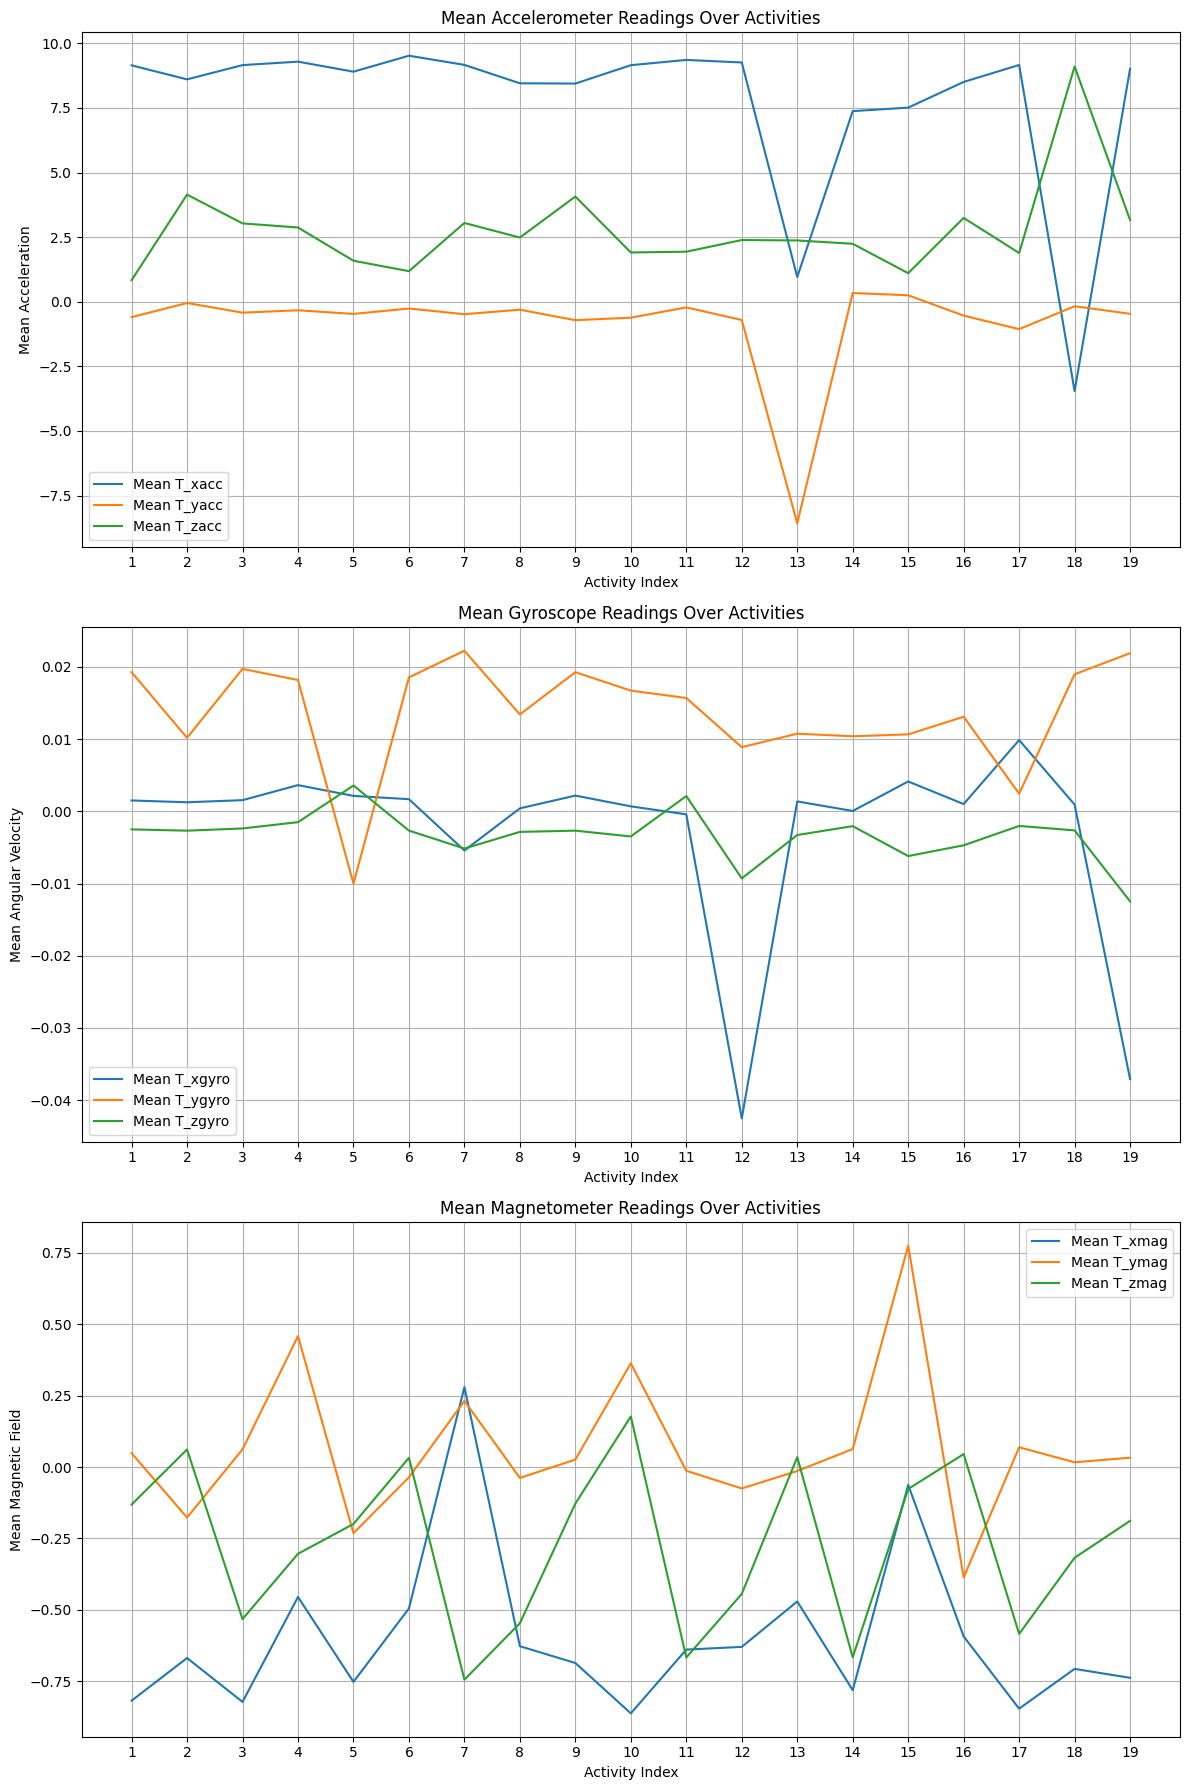

In [ ]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

# Read the Parquet dataset into a polars DataFrame
df_eda = pl.read_parquet('dataset.parquet')

# Define column groups for gyroscope and magnetometer data
gyroscope_cols = ['T_xgyro', 'T_ygyro', 'T_zgyro']
magnetometer_cols = ['T_xmag', 'T_ymag', 'T_zmag']

# Aggregate gyroscope and magnetometer data by activity (calculate mean or median)
gyroscope_mean_by_activity = df_eda.groupby('Activity').agg(
    pl.mean('T_xgyro').alias('mean_T_xgyro'),
    pl.mean('T_ygyro').alias('mean_T_ygyro'),
    pl.mean('T_zgyro').alias('mean_T_zgyro')
)

magnetometer_mean_by_activity = df_eda.groupby('Activity').agg(
    pl.mean('T_xmag').alias('mean_T_xmag'),
    pl.mean('T_ymag').alias('mean_T_ymag'),
    pl.mean('T_zmag').alias('mean_T_zmag')
)

# Extract mean gyroscope and magnetometer readings for plotting
mean_T_xgyro = gyroscope_mean_by_activity['mean_T_xgyro'].to_numpy()
mean_T_ygyro = gyroscope_mean_by_activity['mean_T_ygyro'].to_numpy()
mean_T_zgyro = gyroscope_mean_by_activity['mean_T_zgyro'].to_numpy()

mean_T_xmag = magnetometer_mean_by_activity['mean_T_xmag'].to_numpy()
mean_T_ymag = magnetometer_mean_by_activity['mean_T_ymag'].to_numpy()
mean_T_zmag = magnetometer_mean_by_activity['mean_T_zmag'].to_numpy()

# Define activity indices (assuming 19 activities)
activity_indices = range(1, 20)  # Activity indices from 1 to 19

# Create subplots for accelerometer, gyroscope, and magnetometer data
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot mean accelerometer readings over activities
axs[0].plot(activity_indices, mean_T_xacc, label='Mean T_xacc')
axs[0].plot(activity_indices, mean_T_yacc, label='Mean T_yacc')
axs[0].plot(activity_indices, mean_T_zacc, label='Mean T_zacc')
axs[0].set_title('Mean Accelerometer Readings Over Activities')
axs[0].set_xlabel('Activity Index')
axs[0].set_ylabel('Mean Acceleration')
axs[0].set_xticks(activity_indices)
axs[0].legend()
axs[0].grid()

# Plot mean gyroscope readings over activities
axs[1].plot(activity_indices, mean_T_xgyro, label='Mean T_xgyro')
axs[1].plot(activity_indices, mean_T_ygyro, label='Mean T_ygyro')
axs[1].plot(activity_indices, mean_T_zgyro, label='Mean T_zgyro')
axs[1].set_title('Mean Gyroscope Readings Over Activities')
axs[1].set_xlabel('Activity Index')
axs[1].set_ylabel('Mean Angular Velocity')
axs[1].set_xticks(activity_indices)
axs[1].legend()
axs[1].grid()

# Plot mean magnetometer readings over activities
axs[2].plot(activity_indices, mean_T_xmag, label='Mean T_xmag')
axs[2].plot(activity_indices, mean_T_ymag, label='Mean T_ymag')
axs[2].plot(activity_indices, mean_T_zmag, label='Mean T_zmag')
axs[2].set_title('Mean Magnetometer Readings Over Activities')
axs[2].set_xlabel('Activity Index')
axs[2].set_ylabel('Mean Magnetic Field')
axs[2].set_xticks(activity_indices)
axs[2].legend()
axs[2].grid()

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


### Correlation Matrix

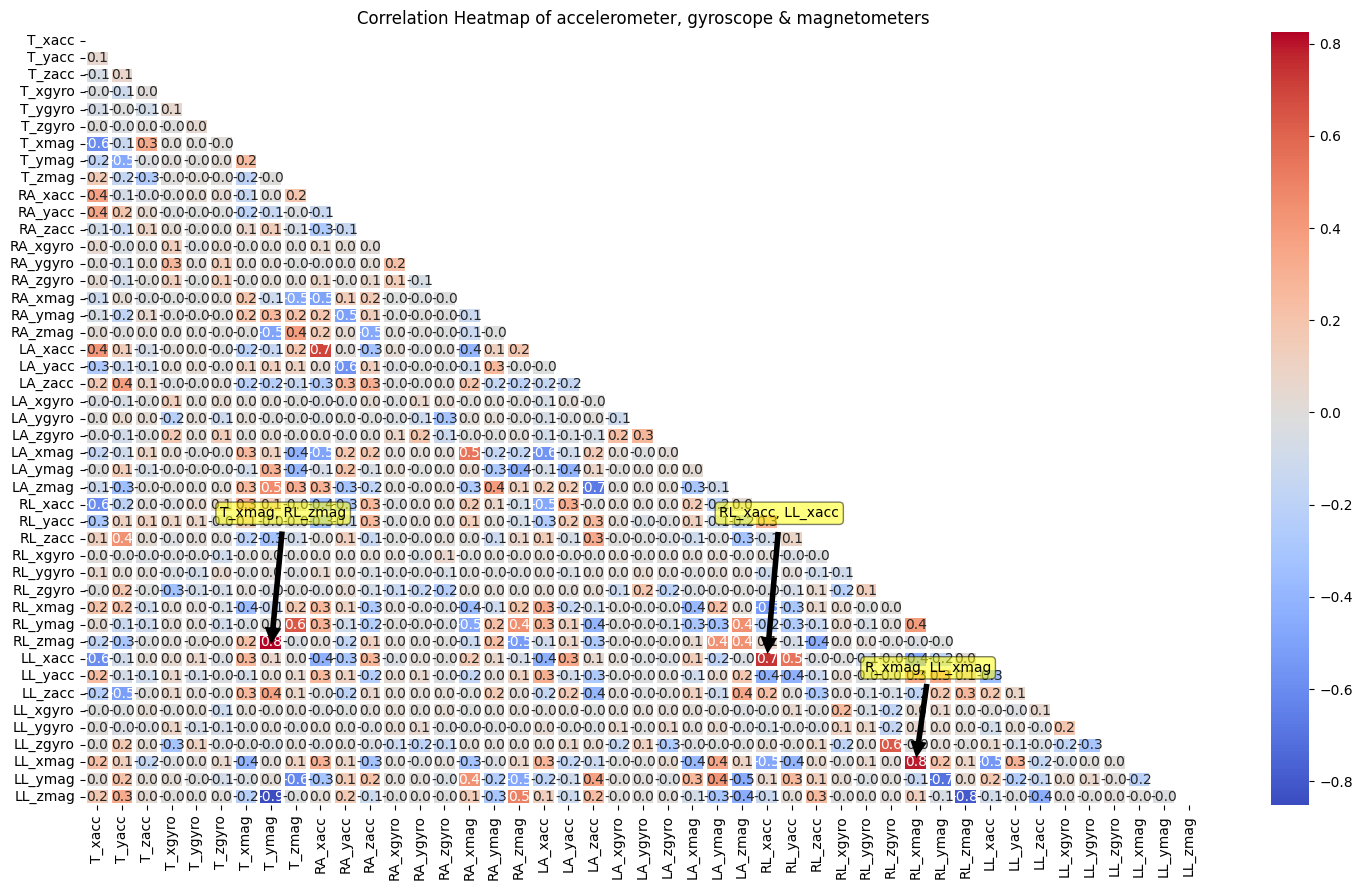

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame containing accelerometer, gyroscope, and magnetometer data

plt.figure(figsize=(15, 9))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap with annotations and adjust parameters
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.1f', linewidths=1.5, mask=mask)

# Add title to the plot
plt.title('Correlation Heatmap of accelerometer, gyroscope & magnetometers')

# Define function to annotate with background color
def annotate_with_background(text, xy, xytext, color):
    plt.annotate(text, xy=xy, xytext=xytext, ha='center', va='center',
                 arrowprops=dict(facecolor='black', shrink=0.05, linewidth=0.005),
                 bbox=dict(boxstyle='round,pad=0.3', fc=color, alpha=0.5))

# Adding annotations with adjusted positions and background color
annotate_with_background('T_xmag, RL_zmag', xy=(7.5, 36), xytext=(8, 28), color='yellow')
annotate_with_background('R_xmag, LL_xmag', xy=(33.5, 42.5), xytext=(34, 37), color='yellow')
annotate_with_background('RL_xacc, LL_xacc', xy=(27.5, 36.6), xytext=(28, 28), color='yellow')

# Adjust layout to prevent annotations from going out of the plot area
plt.tight_layout()

# Show the plot
plt.show()


# **DATA TRANSFORMATION**
by AGGREGATION METHOD

In [ ]:
# Dropping Higly Correlated independent Features
# df = df.drop(columns=['RL_zmag', 'LL_xacc', 'LL_xmag'], axis=1)


In [ ]:
import pandas as pd

# Define the time window for feature aggregation (e.g., 1 second)
window_size = 25  # Assuming data is sampled at 25 Hz (1 sample every 0.04 seconds)

# Define the aggregation functions to apply to each column
aggregation_functions = ['mean', 'std', 'max', 'min']

# Dictionary to store aggregated features for each column
aggregated_features = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    # Skip columns that are not numeric (e.g., 'timestamp')
    if df[column].dtype not in [int, float]:
        continue

    # Group data by time windows and calculate aggregation functions
    grouped_data = df[column].groupby(df.index // window_size)
    column_aggregated = grouped_data.agg(aggregation_functions)

    # Rename columns with prefix based on the original column name
    column_aggregated.columns = [f'{column}_{agg}' for agg in aggregation_functions]

    # Store aggregated features for the current column in the dictionary
    aggregated_features[column] = column_aggregated

# Create a DataFrame from the aggregated features dictionary
aggregated_df = pd.concat(aggregated_features.values(), axis=1)

# Reset the index of the aggregated DataFrame to use numeric indices
aggregated_df.reset_index(drop=True, inplace=True)

# View the aggregated features DataFrame
aggregated_df.head()


,T_xacc_mean,T_xacc_std,T_xacc_max,T_xacc_min,T_yacc_mean,T_yacc_std,T_yacc_max,T_yacc_min,T_zacc_mean,T_zacc_std,...,LL_xmag_max,LL_xmag_min,LL_ymag_mean,LL_ymag_std,LL_ymag_max,LL_ymag_min,LL_zmag_mean,LL_zmag_std,LL_zmag_max,LL_zmag_min
0,8.061668,0.027958,8.1304,8.0111,1.128992,0.028617,1.1897,1.0791,5.469324,0.055884,...,0.74283,0.73911,0.302618,0.000841,0.30378,0.30115,-0.055663,0.000860,-0.054149,-0.057237
1,7.952852,0.030826,8.0114,7.9065,1.148128,0.023003,1.1903,1.0795,5.615284,0.062655,...,0.74303,0.73963,0.303027,0.000632,0.30438,0.30152,-0.055811,0.000872,-0.053614,-0.057160
2,7.906244,0.019337,7.9514,7.8766,1.168624,0.019415,1.2197,1.1381,5.694188,0.038261,...,0.74316,0.73978,0.303052,0.000817,0.30437,0.30122,-0.055928,0.000802,-0.054527,-0.057971
3,7.908344,0.018950,7.9516,7.8691,1.162156,0.025179,1.2274,1.1088,5.676852,0.037790,...,0.74222,0.73936,0.302906,0.000821,0.30478,0.30187,-0.055878,0.001023,-0.053909,-0.057456
4,7.998612,0.037431,8.0865,7.9514,1.143004,0.021619,1.1975,1.0797,5.540732,0.089659,...,0.74274,0.74028,0.302874,0.000689,0.30411,0.30147,-0.055580,0.000806,-0.054414,-0.057162


In [ ]:
df1 = aggregated_df

In [ ]:
# Number of rows and Columns in the dataset

print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Columns: {df1.shape[1]}')


Number of Rows: 45600
Number of Columns: 180


##### ADDING TARGET VARIABLES (ACTIVITY AND SUBJECT)

In [ ]:
# Define the number of unique subject values (1 to 8)
num_subjects = 8
# Define the number of unique activity values (1 to 19)
num_activities = 19

# Calculate the number of rows in df1
num_rows = len(df1)

# Create the sequence of repeating subject values
subject_values = np.repeat(np.arange(1, num_subjects + 1), 5700)

# Create the sequence of repeating activity values
activity_values = np.repeat(np.arange(1, num_activities + 1), 2400)

# Add the 'Subject' and 'Activity' columns to the DataFrame
df1['Subject'] = subject_values
df1['Activity'] = activity_values

# Print the updated DataFrame
df1.head()


,T_xacc_mean,T_xacc_std,T_xacc_max,T_xacc_min,T_yacc_mean,T_yacc_std,T_yacc_max,T_yacc_min,T_zacc_mean,T_zacc_std,...,LL_ymag_mean,LL_ymag_std,LL_ymag_max,LL_ymag_min,LL_zmag_mean,LL_zmag_std,LL_zmag_max,LL_zmag_min,Subject,Activity
0,8.061668,0.027958,8.1304,8.0111,1.128992,0.028617,1.1897,1.0791,5.469324,0.055884,...,0.302618,0.000841,0.30378,0.30115,-0.055663,0.000860,-0.054149,-0.057237,1,1
1,7.952852,0.030826,8.0114,7.9065,1.148128,0.023003,1.1903,1.0795,5.615284,0.062655,...,0.303027,0.000632,0.30438,0.30152,-0.055811,0.000872,-0.053614,-0.057160,1,1
2,7.906244,0.019337,7.9514,7.8766,1.168624,0.019415,1.2197,1.1381,5.694188,0.038261,...,0.303052,0.000817,0.30437,0.30122,-0.055928,0.000802,-0.054527,-0.057971,1,1
3,7.908344,0.018950,7.9516,7.8691,1.162156,0.025179,1.2274,1.1088,5.676852,0.037790,...,0.302906,0.000821,0.30478,0.30187,-0.055878,0.001023,-0.053909,-0.057456,1,1
4,7.998612,0.037431,8.0865,7.9514,1.143004,0.021619,1.1975,1.0797,5.540732,0.089659,...,0.302874,0.000689,0.30411,0.30147,-0.055580,0.000806,-0.054414,-0.057162,1,1


In [ ]:
correlation_matrix = df1.corr()

# Filter the correlation matrix to find pairs with correlation >= 0.7
high_correlation_pairs = []

# Iterate over the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= 0.8:  # Check absolute correlation
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_correlation_pairs.append((col1, col2, corr_value))

# Display pairs of columns with correlation >= 0.7
if high_correlation_pairs:
    print("Pairs of columns with correlation >= 0.8:")
    for col1, col2, corr_value in high_correlation_pairs:
        print(f"{col1} - {col2}: {corr_value}")

Pairs of columns with correlation >= 0.8:
T_xacc_mean - T_xmag_mean: -0.8490674287649214
T_xacc_mean - T_xmag_max: -0.8257125584682622
T_xacc_mean - T_xmag_min: -0.8499280958596684
T_xacc_std - T_xacc_max: 0.905127506819527
T_xacc_std - T_zacc_std: 0.8012928114323749
T_xacc_std - RL_xacc_std: 0.9077699060023497
T_xacc_std - RL_xacc_min: -0.843314769504872
T_xacc_std - LL_xacc_std: 0.9344424378742554
T_xacc_std - LL_xacc_min: -0.8571265059575242
T_xacc_max - RL_xacc_std: 0.8359675499299069
T_xacc_max - RL_xacc_min: -0.8468834052479234
T_xacc_max - LL_xacc_std: 0.8494910567262779
T_xacc_max - LL_xacc_min: -0.8417262227764475
T_yacc_std - T_xgyro_std: 0.8315367773204293
T_yacc_std - T_zgyro_std: 0.8268751113474255
T_zacc_std - T_zacc_max: 0.8607341960489613
T_xgyro_std - T_xgyro_max: 0.9131882988089589
T_xgyro_std - T_xgyro_min: -0.9195037914405787
T_xgyro_std - T_zgyro_std: 0.8432487621079935
T_ygyro_std - T_ygyro_max: 0.9193384800540598
T_ygyro_std - T_ygyro_min: -0.9510901789098108
T_z

**Conclusion:**

Above Transdormation Method (Aggregation) can not be used because it's giving higly correlated independent values, which will cause UNDERFITTING.

# **IMPLEMENTING PRINCIPAL COMPONENT ANALYSIS (PCA)**

In [ ]:
import polars as pl

# Read the Parquet file into a Polars DataFrame
data = pl.read_parquet('dataset.parquet')


In [ ]:
# List of columns to exclude
columns_to_exclude = ['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity']

# Select all columns except those to exclude
X = data.select([col for col in data.columns if col not in columns_to_exclude])

# Extract the target variable (Activity column)
y = data['Activity']

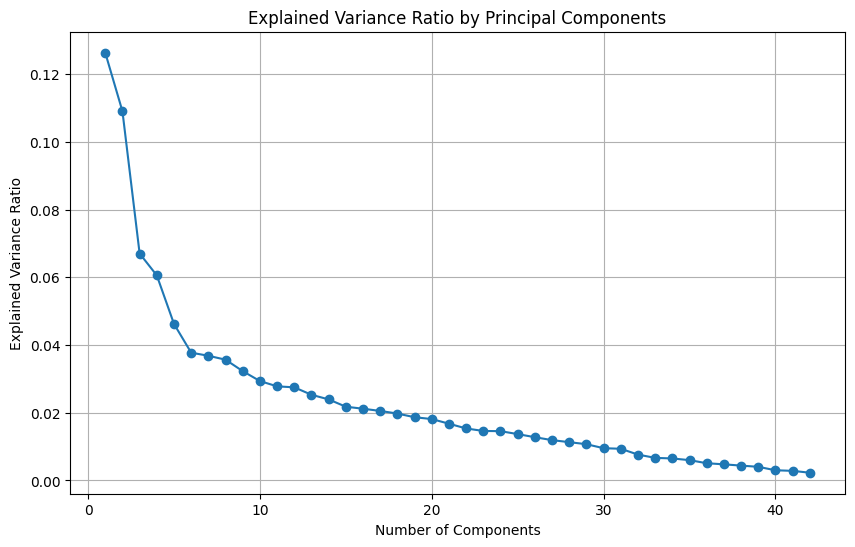

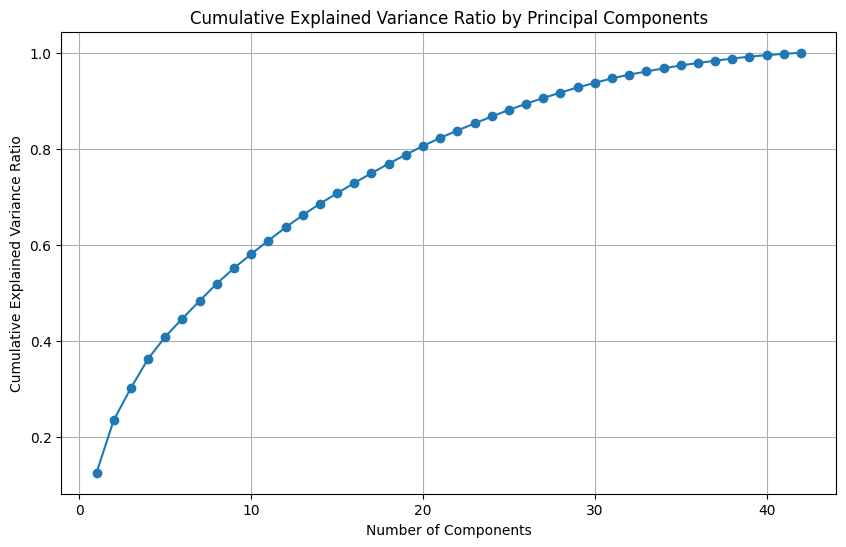

Number of components for 90% variance explained: 27


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the feature matrix
scalers = StandardScaler()
X_scaled = scalers.fit_transform(X)  # X is your feature matrix

# Initialize PCA
pca = PCA()
pca.fit(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

# Determine number of components for desired variance explained (e.g., 90%)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components for 90% variance explained: {n_components}")

In [ ]:
# Reading Eigen Vectors for Each Component

n_components = 6
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Access the principal components (eigenvectors)
principal_components = pca.components_

# Create a DataFrame to display the principal components with original feature names
columns = X.columns  # Original feature names
pc_columns = [f"PC{i+1}" for i in range(n_components)]  # PC column names

# Extract only the required number of components (n_components)
principal_components_subset = principal_components[:n_components, :]

# Create DataFrame
df_pc = pd.DataFrame(data=principal_components_subset.T, columns=pc_columns, index=columns)

# Display the principal components
print("Principal Components (Eigenvectors):")
print(df_pc)

Principal Components (Eigenvectors):
               PC1       PC2       PC3       PC4       PC5       PC6
T_xacc    0.126474  0.257206  0.166283  0.033874 -0.088498  0.205910
T_yacc   -0.071155  0.285699 -0.133205  0.073014 -0.115768 -0.157638
T_zacc   -0.067628 -0.015315 -0.047286 -0.006864  0.073449 -0.058461
T_xgyro   0.002589 -0.037482  0.159220 -0.309718 -0.039674  0.102202
T_ygyro  -0.001713 -0.015044 -0.036202 -0.024629 -0.055403 -0.007427
T_zgyro  -0.004473 -0.017465  0.021436 -0.071805 -0.026224  0.313508
T_xmag   -0.084282 -0.254582 -0.079767  0.018132  0.208051 -0.114632
T_ymag    0.000636 -0.307736  0.285113  0.222311 -0.100907  0.042710
T_zmag    0.267734 -0.045344 -0.166874 -0.100730 -0.067686  0.114038
RA_xacc   0.293940  0.059775  0.088810  0.043876 -0.192208  0.008998
RA_yacc  -0.064307  0.251905  0.159482  0.022847  0.286567  0.159966
RA_zacc  -0.187330 -0.118886 -0.006192 -0.041778 -0.255644  0.101604
RA_xgyro  0.009951 -0.003364  0.120147 -0.146782 -0.013670  0.1119

In [ ]:
# Number of rows and Columns in the dataset

print(f'Number of Rows: {df_pc.shape[0]}')
print(f'Number of Rows: {df_pc.shape[1]}')

Number of Rows: 42
Number of Rows: 6


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Initialize t-SNE with optimized parameters
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=500, random_state=42)

# Perform dimensionality reduction using optimized t-SNE
tsne_result = tsne.fit_transform(X_subset)  # Using subsampled data

# Create DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])

# Plot t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], alpha=0.5)
plt.title('t-SNE Visualization of Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


# **IMPLEMENTING "DASK" LIBRARY**

In [ ]:
!pip install dask

In [ ]:
!pip install dask-ml

In [ ]:
!pip list | grep dask-ml

In [ ]:
import dask.dataframe as dd

# Load data into Dask DataFrame
ddf = dd.read_parquet('dataset.parquet')


#### Data Transformation (Scaling)

In [ ]:
from dask_ml.preprocessing import StandardScaler
from dask_ml.decomposition import PCA

# Prepare feature matrix (X) and target variable (y)
X = ddf.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)
y = ddf['Activity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Implementing Principal Component Analysis (PCA)**

In [ ]:
import dask_ml.decomposition as dm_decomp

# Convert Dask DataFrame to Dask Array with explicit lengths
X_array = X_scaled.to_dask_array(lengths=True)

# Instantiate PCA from Dask-ML with specific solver and fit to the Dask Array
n_components = 6
pca = dm_decomp.PCA(n_components=n_components, svd_solver='randomized')  # Specify svd_solver
X_pca = pca.fit_transform(X_array)


# **K - Nearest neigbour (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_pca_pd = X_pca.compute()
y_pd = y.compute()

X_train, X_test, y_train, y_test = train_test_split(X_pca_pd, y_pd, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9055131578947369


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Generate a classification report for detailed performance metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     11913
           2       0.99      1.00      1.00     11946
           3       1.00      1.00      1.00     12037
           4       1.00      1.00      1.00     12142
           5       0.86      0.87      0.86     12006
           6       0.83      0.91      0.87     11999
           7       0.96      0.99      0.97     12299
           8       0.83      0.84      0.84     11926
           9       0.84      0.92      0.88     11960
          10       0.85      0.90      0.87     11999
          11       0.85      0.88      0.86     12078
          12       0.89      0.89      0.89     11973
          13       0.86      0.91      0.88     12081
          14       0.88      0.90      0.89     11950
          15       0.98      0.99      0.98     11941
          16       0.95      0.97      0.96     11962
          17       0.99      1.00      0.99     11889
   

# OPTIMIZATION OF KNN MODEL

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define a pipeline with PCA and KNN
pipe = Pipeline([
    ('pca', PCA()),  # PCA transformer (n_components will be tuned by GridSearchCV)
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Define the parameter grid for grid search
param_grid = {
    'pca__n_components': [6, 10, 15],  # Test PCA components within a feasible range
    'knn__n_neighbors': [3, 5]  # Test different k values for KNN
}

# Initialize GridSearchCV with 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipe, param_grid, cv=kf, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}, Best Accuracy: {best_score:.2f}")


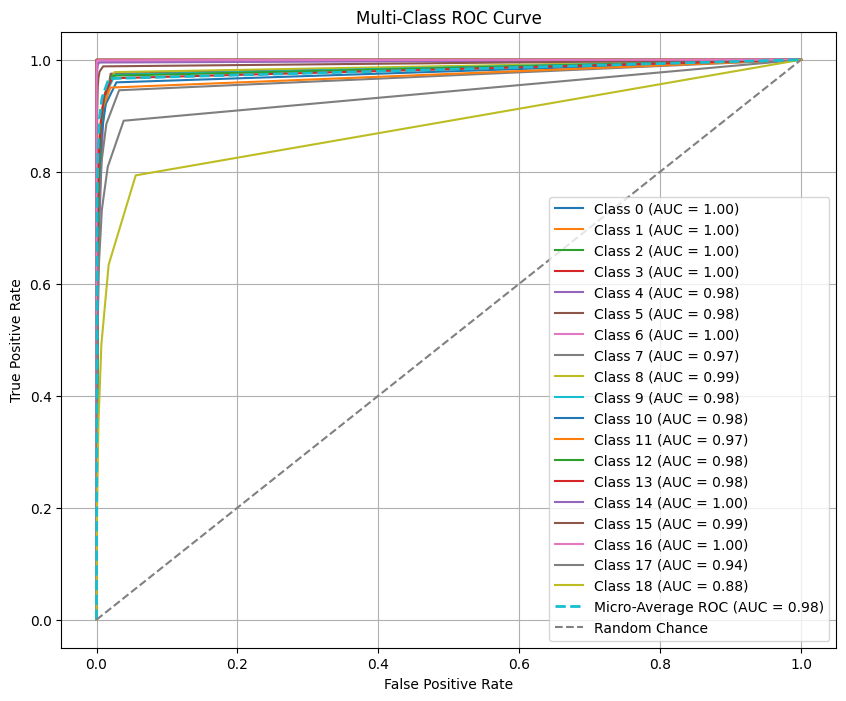

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC analysis
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probabilities for each class
y_prob = best_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label=f'Micro-Average ROC (AUC = {roc_auc_micro:0.2f})', linestyle='--', linewidth=2)

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# **Random Forest**

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Assuming you have defined X and y from your dataset
# X = ddf.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)
# y = ddf['Activity']

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_pca_pd, y_pd, test_size=0.2, random_state=42)

# Initialize and train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as needed
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")


Accuracy on test set: 0.91


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Generate a classification report for detailed performance metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     11913
           2       1.00      1.00      1.00     11946
           3       1.00      1.00      1.00     12037
           4       1.00      1.00      1.00     12142
           5       0.85      0.87      0.86     12006
           6       0.83      0.92      0.88     11999
           7       0.98      0.99      0.98     12299
           8       0.85      0.83      0.84     11926
           9       0.87      0.90      0.88     11960
          10       0.85      0.89      0.87     11999
          11       0.87      0.86      0.86     12078
          12       0.89      0.88      0.89     11973
          13       0.86      0.90      0.88     12081
          14       0.88      0.90      0.89     11950
          15       0.98      0.99      0.98     11941
          16       0.95      0.96      0.96     11962
          17       0.99      1.00      0.99     11889
   

## HYPERPARAMTER TUNNING (Random Forest)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

X_pca_pd = X_pca.compute()
y_pd = y.compute()


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_pd, y_pd, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV with the random forest classifier and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on the test set using the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy on test set: {accuracy:.2f}")


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have defined X and y from your dataset
# X = ddf.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)
# y = ddf['Activity']

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_pca_pd, y_pd, test_size=0.2, random_state=42)

# Initialize and train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)  # Adjust parameters as needed
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")


# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have defined X and y from your dataset
# X = ddf.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)
# y = ddf['Activity']

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_pca_pd, y_pd, test_size=0.2, random_state=42)

# Initialize and train SVM classifier
svm = SVC(kernel='rbf', random_state=42)  # Adjust parameters as needed
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")
